In [27]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

np.random.seed(1) #设置一个固定的随机种子，以保证接下来的步骤中我们的结果是一致的。

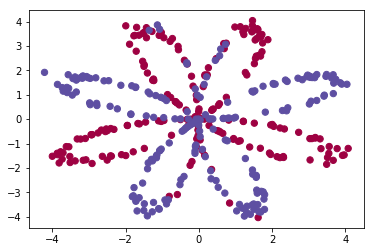

In [28]:
X,Y=load_planar_dataset()
plt.scatter(X[0,:],X[1,:],c=np.squeeze(Y),s=40,cmap=plt.cm.Spectral)

In [29]:
shape_X=X.shape
shape_Y=Y.shape
m=Y.shape[1]
print("X的维度为："+str(shape_X))
print("Y的维度为："+str(shape_Y))
print("数据集中的数据数量："+str(m))

X的维度为：(2, 400)
Y的维度为：(1, 400)
数据集中的数据数量：400


In [30]:
clf=sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

逻辑回归的准确性： 47 % (正确标记的数据点所占的百分比)


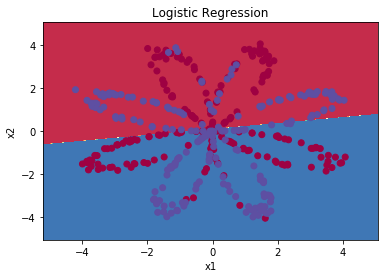

In [31]:
plot_decision_boundary(lambda x: clf.predict(x), X, np.squeeze(Y)) #绘制决策边界
plt.title("Logistic Regression") #图标题
LR_predictions  = clf.predict(X.T) #预测结果
print ("逻辑回归的准确性： %d " % float((np.dot(Y, LR_predictions) + 
		np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       "% " + "(正确标记的数据点所占的百分比)")

In [38]:
def layer_sizes(X, Y):
    n_x=X.shape[0]
    n_h=4
    n_y=Y.shape[0]
    
    return(n_x,n_h,n_y)

#测试layer_sizes
print("=========================测试layer_sizes=========================")
X_asses , Y_asses = layer_sizes_test_case()
(n_x,n_h,n_y) =  layer_sizes(X_asses,Y_asses)
print("输入层的节点数量为: n_x = " + str(n_x))
print("隐藏层的节点数量为: n_h = " + str(n_h))
print("输出层的节点数量为: n_y = " + str(n_y))

=========================测试layer_sizes=========================
输入层的节点数量为: n_x = 5
隐藏层的节点数量为: n_h = 4
输出层的节点数量为: n_y = 2


In [80]:
def initialize_parameters(n_x,n_h,n_y):
    np.random.seed(2)
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros(shape=(n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros(shape=(n_y,1))
    
    assert(W1.shape==(n_h,n_x))
    assert(b1.shape==(n_h,1))
    assert(W2.shape==(n_y,n_h))
    assert(b2.shape==(n_y,1))
    
    parameters={"W1":W1,
                "b1":b1,
                "W2":W2,
                "b2":b2
               }
    return parameters
#测试initialize_parameters
print("=========================测试initialize_parameters=========================")
n_x , n_h , n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x , n_h , n_y )
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

=========================测试initialize_parameters=========================
W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [81]:
def forward_propagation(X,parameters):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]

    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)
    
    assert(A2.shape== (1,X.shape[1]) )
    cache={"Z1":Z1,
           "A1":A1,
           "Z2":Z2,
           "A2":A2
          }
    return (A2,cache)

#测试forward_propagation
print("=========================测试forward_propagation=========================")
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters_test)
print(np.mean(cache["Z1"]), np.mean(cache["A1"]), np.mean(cache["Z2"]), np.mean(cache["A2"]))

=========================测试forward_propagation=========================
-0.0004997544339153996 -0.0004969620107537464 0.00043818744073098386 0.5001095468498741


In [82]:
def compute_cost(A2,Y,parameters):
    m=Y.shape[1]
    W1=parameters["W1"]
    W2=parameters["W2"]
    
    logprobs=np.multiply(np.log(A2), Y) + np.multiply((1-Y) ,np.log(1-A2))
    cost=-np.sum(logprobs)/m
    cost=float(np.squeeze(cost))
    
    assert(isinstance(cost,float))
    
    return cost
#测试compute_cost
print("=========================测试compute_cost=========================") 
A2 , Y_assess , parameters = compute_cost_test_case()
print("cost = " + str(compute_cost(A2,Y_assess,parameters)))

=========================测试compute_cost=========================
cost = 0.6929198937761266


In [83]:
def backward_propagation(parameters,cache,X,Y):
    m=X.shape[1]
    W1=parameters["W1"]
    W2=parameters["W2"]
    A1=cache["A1"]
    A2=cache["A2"]
    
    dZ2=A2-Y
    dW2=(1/m) * np.dot(dZ2,A1.T)
    db2=(1/m) * np.sum(dZ2,axis=1,keepdims=True)
    dZ1=np.multiply(np.dot(W2.T,dZ2), 1-np.power(A1,2))
    dW1=(1/m) * np.dot(dZ1,X.T)
    db1=(1/m) * np.sum(dZ1,axis=1,keepdims=True)
    grads={
        "dW1":dW1,
        "db1":db1,
        "dW2":dW2,
        "db2":db2
    }
    return grads
#测试backward_propagation
print("=========================测试backward_propagation=========================")
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

=========================测试backward_propagation=========================
dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [84]:
def update_parameters(parameters, grads, learning_rate=1.2):
    W1,W2=parameters["W1"], parameters["W2"]
    b1,b2=parameters["b1"], parameters["b2"]
    
    dW1,dW2=grads["dW1"], grads["dW2"]
    db1,db2=grads["db1"],grads["db2"]
    
    W1=W1-learning_rate*dW1
    W2=W2-learning_rate*dW2
    b1=b1-learning_rate*db1
    b2=b2-learning_rate*db2
    
    parameters={"W1":W1,
                "b1":b1,
                "W2":W2,
                "b2":b2
               }
    return parameters

#测试update_parameters
print("=========================测试update_parameters=========================")
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

=========================测试update_parameters=========================
W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [92]:
def nn_model(X,Y,n_h,num_iterations,print_cost=False):
    np.random.seed(3)
    n_x=layer_sizes(X,Y)[0]
    n_y=layer_sizes(X,Y)[2]
    
    parameters=initialize_parameters(n_x, n_h, n_y)
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    for i in range(num_iterations):
        A2, cache= forward_propagation(X,parameters)
        cost=compute_cost(A2,Y,parameters)
        grads=backward_propagation(parameters,cache,X,Y)
        parameters=update_parameters(parameters,grads,learning_rate=0.5)
        
        if print_cost:
            if i%100==0:
                print("第",i," 次循环, cost为："+ str(cost) )
    return parameters
#测试nn_model
print("=========================测试nn_model=========================")
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

=========================测试nn_model=========================


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


W1 = [[-3.89167767  4.77541602]
 [-6.77960338  1.20272585]
 [-3.88338966  4.78028666]
 [ 6.77958203 -1.20272574]]
b1 = [[ 2.11530892]
 [ 3.41221357]
 [ 2.11585732]
 [-3.41221322]]
W2 = [[-2512.9093032  -2502.70799785 -2512.01655969  2502.65264416]]
b2 = [[-22.29071761]]


=========================测试predict=========================
预测的平均值 = 0.6666666666666666
第 0  次循环, cost为：0.6930480201239823
第 100  次循环, cost为：0.631798657849813
第 200  次循环, cost为：0.6083974399435687
第 300  次循环, cost为：0.45174758159914546
第 400  次循环, cost为：0.3628638637518252
第 500  次循环, cost为：0.34060259042201396
第 600  次循环, cost为：0.32945606004699507
第 700  次循环, cost为：0.3222889676359956
第 800  次循环, cost为：0.3170989285267484
第 900  次循环, cost为：0.31307218013800847
第 1000  次循环, cost为：0.3098018601352803
第 1100  次循环, cost为：0.30705674437248964
第 1200  次循环, cost为：0.30469369872814317
第 1300  次循环, cost为：0.302618564206536
第 1400  次循环, cost为：0.3007665191974136
第 1500  次循环, cost为：0.2990913402318003
第 1600  次循环, cost为：0.2975591341071944
第 1700  次循环, cost为：0.2961444870740644
第 1800  次循环, cost为：0.29482799767766305
第 1900  次循环, cost为：0.2935946385798926
第 2000  次循环, cost为：0.2924326333792646
第 2100  次循环, cost为：0.2913326627926164
第 2200  次循环, cost为：0.29028728671955684
第 2300  次循环, cost为：0.2892905113585177
第 2400

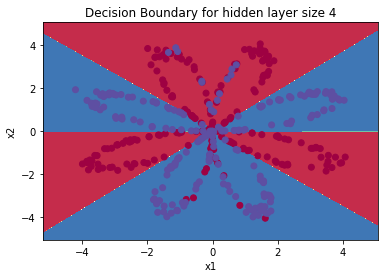

In [96]:
def predict(parameters,X):
    A2, cache= forward_propagation(X, parameters)
    predictions= np.round(A2)
    
    return predictions
#测试predict
# print("=========================测试predict=========================")

# parameters, X_assess = predict_test_case()

# predictions = predict(parameters, X_assess)
# print("预测的平均值 = " + str(np.mean(predictions)))

parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

#绘制边界
plot_decision_boundary(lambda x: predict(parameters, x.T), X, np.squeeze(Y))
plt.title("Decision Boundary for hidden layer size " + str(4))

predictions = predict(parameters, X)
print ('准确率: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

隐藏层的节点个数：1， 准确率：67.25 %
隐藏层的节点个数：2， 准确率：66.5 %
隐藏层的节点个数：3， 准确率：89.25 %
隐藏层的节点个数：4， 准确率：90.0 %
隐藏层的节点个数：5， 准确率：89.75 %
隐藏层的节点个数：20， 准确率：90.0 %
隐藏层的节点个数：50， 准确率：89.75 %


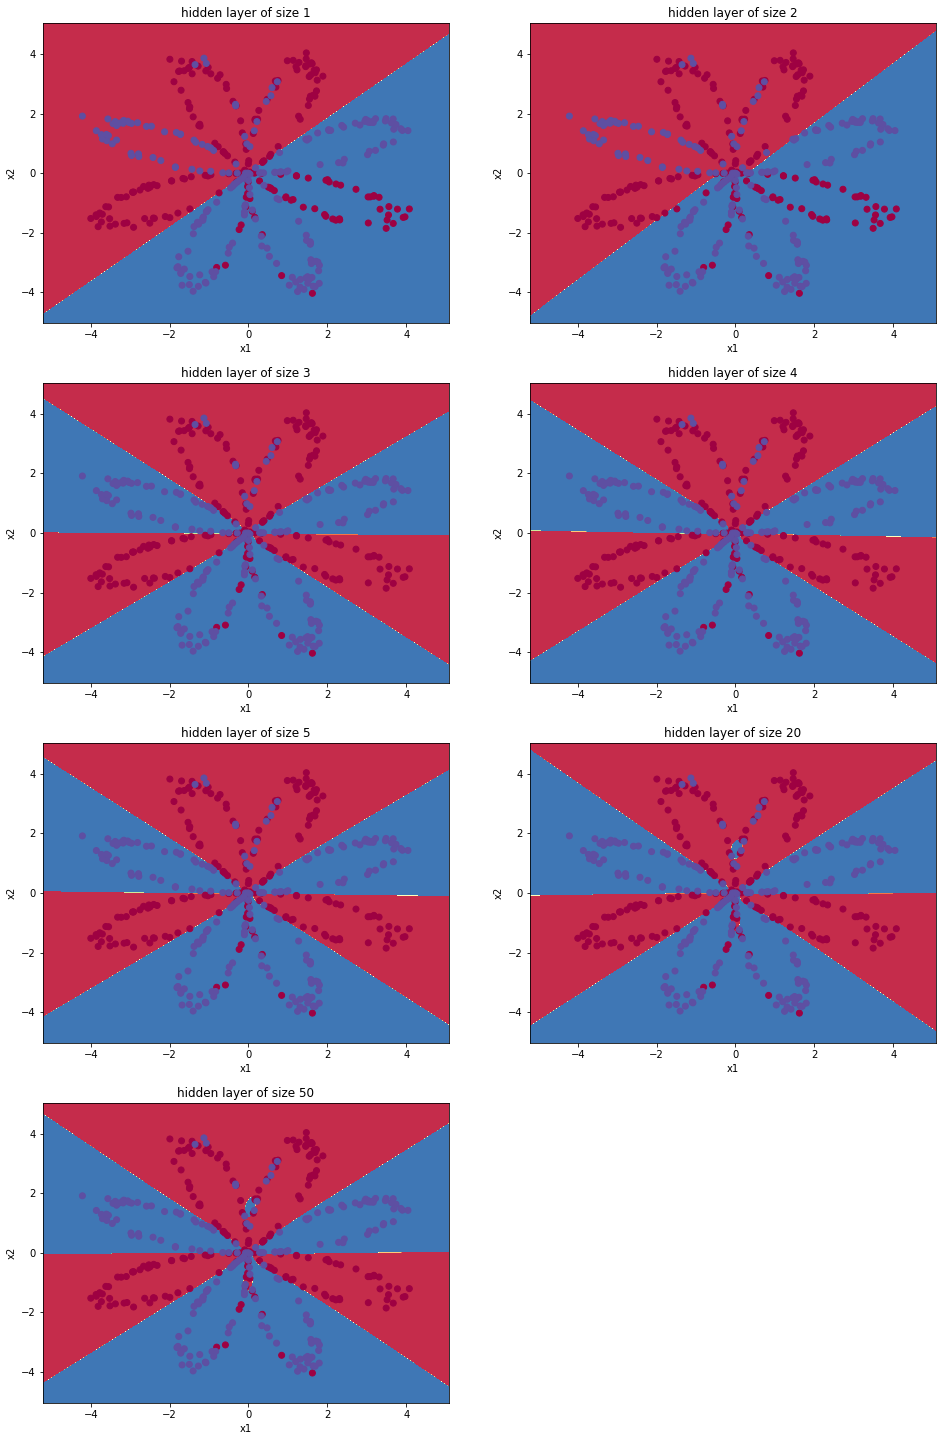

In [100]:
#改变hidden_layer 的节点个数
plt.figure(figsize=(16,32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('hidden layer of size %d' %n_h)
    parameters = nn_model(X,Y,n_h,num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters,x.T), X, np.squeeze(Y))
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100)
    print("隐藏层的节点个数：{}， 准确率：{} %".format(n_h, accuracy))